# 1. Limpeza, tratamento e exploração de valores nulos

Como eu já dei uma espiada na planilha, sei que as coisas já vieram bem estruturadas. Todavia, precisamos fazer alguns ajustes para que os dados se adequem à nossa análise.

In [45]:
%load_ext autoreload
%autoreload 2 
# deixo esse carinha aqui pra toda vez que eu editar o arquivo de funções o notebook acompanhar

import sys
import os
sys.path.append(os.path.abspath("../python"))
# o python guarda uma lista de pastas onde ele procura arquivos para importar. Aqui adicionamos a nossa pasta com o functions.py

from functions import * # aqui estarão as nossas funções, sobretudo plots e geopandas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import geopandas as gpd

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [46]:
df = pd.read_excel("C:/Users/lucas/OneDrive/Documentos/Estudos/Projetos/mega-sena/Data/Mega-Sena.xlsx", "MEGA SENA")
df.head(-10)

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
0,1,11/03/1996,4,5,30,33,41,52,0,NaN,"R$0,00",17,"R$39.158,92",2016,"R$330,21","R$1.714.650,23","R$0,00","R$0,00","R$0,00",NaN
1,2,18/03/1996,9,37,39,41,43,49,1,PR,"R$2.307.162,23",65,"R$14.424,02",4488,"R$208,91","R$0,00","R$0,00","R$0,00","R$0,00",NaN
2,3,25/03/1996,10,11,29,30,36,47,2,RN; SP,"R$391.192,51",62,"R$10.515,93",4261,"R$153,01","R$0,00","R$0,00","R$0,00","R$0,00",NaN
3,4,01/04/1996,1,5,6,27,42,59,0,NaN,"R$0,00",39,"R$15.322,24",3311,"R$180,48","R$717.080,75","R$0,00","R$0,00","R$0,00",NaN
4,5,08/04/1996,1,2,6,16,19,46,0,NaN,"R$0,00",98,"R$5.318,10",5399,"R$96,53","R$1.342.488,85","R$0,00","R$0,00","R$0,00",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2948,2949,09/12/2025,4,6,11,38,49,54,0,NaN,"R$0,00",28,"R$56.175,26",2366,"R$1.095,81","R$30.598.063,28","R$39.471.786,00","R$38.000.000,00","R$158.413.093,16",NaN
2949,2950,11/12/2025,21,23,42,49,50,60,0,NaN,"R$0,00",25,"R$72.246,06",2016,"R$1.476,77","R$36.155.452,41","R$45.325.002,00","R$44.000.000,00","R$159.802.440,46",NaN
2950,2951,13/12/2025,5,8,30,31,37,45,0,NaN,"R$0,00",44,"R$51.339,54",3730,"R$998,26","R$43.106.035,86","R$56.687.628,00","R$52.000.000,00","R$161.540.086,33",NaN
2951,2952,16/12/2025,1,20,45,48,51,58,0,NaN,"R$0,00",16,"R$131.659,90",2041,"R$1.701,29","R$49.587.754,20","R$52.863.654,00","R$58.000.000,00","R$163.160.515,93",NaN


Observando os outputs, a tabela é de tal forma que as linhas representam cada qual um sorteio ao longo do tempo, e as colunas são características em geral, como:

| Coluna  | Descrição |
| ------------- |:-------------|
| Concurso | identificação ordinal do primeiro ao último concurso |
| Data do Sorteio | data de ocorrência de cada sorteio |
| Bola(1 a 5)  | cada bola representa meramente um dos 6 números sorteados em cada jogo, em ordem crescente¹ |
| Ganhadores X acertos (4,5 e 6) |quantos foram os vencedores nas categorias de X acertos |
| Rateio X Acertos (4,5 e 6) | O prêmio de cada categoria |
| Cidade / UF | localidade dos vencedores |
| Acumulado 6 acertos | quanto em R$ cada sorteio de 6 acumulou para o próximo prêmio³ |
| Estimativa prêmio | estimativa da caixa sobre o valor final do prêmio da Sena |
| Arrecadação Total | Valor bruto arrecadado para o sorteio |
| Acumulado Sorteio Especial Mega da Virada |  |
| Observação |  |


#
#

¹. Vale ressaltar que o sorteio é um processo estocástico (como o nome sugere), ou seja, depois que cada número é sorteado, o sexteto é ordenado de forma crescente e então cada bola recebe um dos valores, sendo a bola 1 o menor valor e a bola 6 o maior valor.

². O prêmio de cada categoria (Sena, Quina ou Quadra) é dividido em partes iguais entre todos os que acertaram aquela quantidade de números

³. Quando ninguém acerta a sena, a parte do prêmio que era destinado a pagar os vencedores desta categoria rola integralmente para o próximo prêmio de 6 acertos do próximo concurso



Para dar aquela bisbilhotada no df é muito comum usar o método `.head()`, mas ele te limita a ver apenas o topo ou o final do dataset. Concordo que isso pode resolver a maioria dos casos, mas ao trabalhar com dados reais, olhar apenas uma região da tabela pode introduzir certo viés em sua análise. Existe o `.sample()` que amostra linhas aleatórias do conjunto.

In [47]:
np.random.seed(7) # definir a seed pra garantir reprodutibilidade
df.sample(n=5).sort_values(by='Concurso') # gosto de ordenar a amostra pelo índice

,Concurso,Data do Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Ganhadores 6 acertos,Cidade / UF,Rateio 6 acertos,Ganhadores 5 acertos,Rateio 5 acertos,Ganhadores 4 acertos,Rateio 4 acertos,Acumulado 6 acertos,Arrecadação Total,Estimativa prêmio,Acumulado Sorteio Especial Mega da Virada,Observação
280,281,21/07/2001,5,11,31,38,47,53,1,PR,"R$22.414.093,50",188,"R$13.574,18",12864,"R$197,63","R$0,00","R$0,00","R$0,00","R$0,00",Estimativa prêmio próximo concurso (sena)R$1.0...
1670,1671,21/01/2015,21,27,31,45,55,56,0,NaN,"R$0,00",71,"R$43.701,29",5343,"R$829,60","R$26.809.167,31","R$52.997.997,50","R$34.000.000,00","R$3.480.043,52",NaN
1674,1675,04/02/2015,3,18,34,35,36,56,1,JUNDIAÍ/SP,"R$29.353.109,38",139,"R$23.283,01",10903,"R$424,04","R$0,00","R$55.279.070,00","R$3.000.000,00","R$6.353.879,57",NaN
2654,2655,11/11/2023,10,23,30,31,49,56,0,NaN,"R$0,00",57,"R$57.391,95",3909,"R$1.195,53","R$30.191.355,90","R$56.739.440,00","R$37.000.000,00","R$99.742.915,80",NaN
2865,2866,22/05/2025,1,12,17,19,36,60,1,SAO PAULO/SP,"R$2.784.095,20",55,"R$27.479,38",3882,"R$556,18","R$0,00","R$25.950.340,00","R$3.500.000,00","R$46.031.458,09",NaN


In [48]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   Concurso                                   2963 non-null   int64 
 1   Data do Sorteio                            2963 non-null   object
 2   Bola1                                      2963 non-null   int64 
 3   Bola2                                      2963 non-null   int64 
 4   Bola3                                      2963 non-null   int64 
 5   Bola4                                      2963 non-null   int64 
 6   Bola5                                      2963 non-null   int64 
 7   Bola6                                      2963 non-null   int64 
 8   Ganhadores 6 acertos                       2963 non-null   int64 
 9   Cidade / UF                                624 non-null    object
 10  Rateio 6 acertos                    

Temos algum trabalho a fazer:
1. Precisamos de todas as colunas para nossa análise? Se não, apagar; 
2. Verificar os tipos de dados nas colunas e transformar se necessário (data e valores);
3. Ponderar sobre o uso da coluna Concurso como índice, visto que seu formato é favorável;
4. Solucionar os valores nulos das colunas segundo as suas necessidades.


In [49]:
# Vamos mudar os nomes das colunas pra algo mais curto, assim fica mais fácil de codar!

df = df.rename(columns= {
    'Data do Sorteio' : 'Data_Sorteio',
    'Ganhadores 6 acertos':'Wins_6',
    'Ganhadores 5 acertos':'Wins_5',
    'Ganhadores 4 acertos':'Wins_4',
    'Cidade / UF':'Local',
    'Rateio 6 acertos':'Rateio_6',
    'Rateio 5 acertos':'Rateio_5',   
    'Rateio 4 acertos':'Rateio_4',
    'Arrecadação Total':'Arrecad',
    'Estimativa prêmio':'Estimativa',
    'Acumulado 6 acertos':'Acum_6',
    'Observação':'Obs',
    'Acumulado Sorteio Especial Mega da Virada': 'Virada_Acum'
})

In [50]:
# Agora, vamos aos dtypes. A começar pela data e pelos valores financeiros:

df['Data_Sorteio'] =pd.to_datetime(df['Data_Sorteio'], format= '%d/%m/%Y') #a data era só transformar o formato mesmo

def to_finance(valor_str:str) -> float: #criando uma função rápida para transformar os valores em float
    '''Função que transforma monetários da planilha em floats acionáveis pelo Python: \
        Recebe valores em str > exlui os caracteres desnecessários > transforma em float '''
    if pd.isna(valor_str) : 
        return 0.0
    
    valor_limpo = valor_str.replace('R$','').strip()
    valor_limpo = valor_limpo.replace('.','')
    valor_limpo = float(valor_limpo.replace(',','.'))

    return valor_limpo
    

In [51]:
valores_errados = ['Rateio_6','Rateio_5','Rateio_4','Acum_6', 'Arrecad','Estimativa','Virada_Acum'] 
# Assumo que dá pra fazer essa iteração com um loop for padrão, mas é mais performático fazer com o .map()

df[valores_errados] = df[valores_errados].map(to_finance) # o map é como o apply, mas é otimizado para funções simples de transformação.

In [52]:
df.info(verbose=True, show_counts=True) #agora parece tudo ok. Temos todas as variáveis com os formatos adequados!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2963 entries, 0 to 2962
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Concurso      2963 non-null   int64         
 1   Data_Sorteio  2963 non-null   datetime64[ns]
 2   Bola1         2963 non-null   int64         
 3   Bola2         2963 non-null   int64         
 4   Bola3         2963 non-null   int64         
 5   Bola4         2963 non-null   int64         
 6   Bola5         2963 non-null   int64         
 7   Bola6         2963 non-null   int64         
 8   Wins_6        2963 non-null   int64         
 9   Local         624 non-null    object        
 10  Rateio_6      2963 non-null   float64       
 11  Wins_5        2963 non-null   int64         
 12  Rateio_5      2963 non-null   float64       
 13  Wins_4        2963 non-null   int64         
 14  Rateio_4      2963 non-null   float64       
 15  Acum_6        2963 non-null   float64 

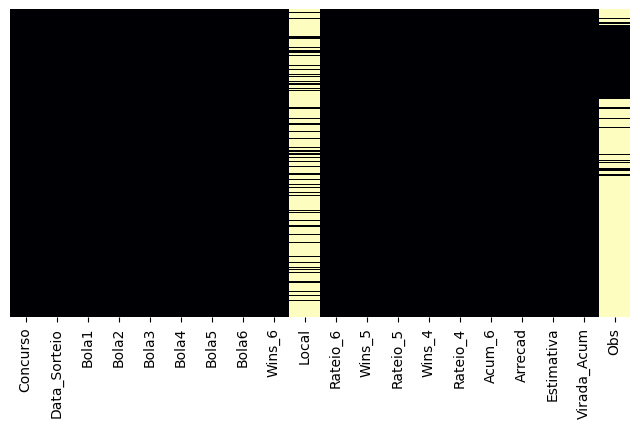

In [53]:
# plotando os valores nulos do df com um heatmap para ter uma ideia da sua distribuição
plt.figure(figsize=(8, 4))

sns.heatmap(df.isnull(), 
            yticklabels=False, 
            cbar=False,
            cmap='magma')
plt.show()

1. Vemos que existem concursos sem indicação de Cidade/UF, e isso pode ser derivado das seguintes causas: concursos sem ganhadores ou ganhadores sem localidade informada.

2. Vemos também que a variável "Obs" tem muitos valores vazios, sobretudo em concursos mais recentes.
#
- Todo concurso tem ganhadores em todas as categorias?
#
- A localidade é uma variável que descreve apenas os concursos de 6 ganhadores?
#
- Os comentários na variável "Obs" são próprios de algum tipo de concurso?


In [54]:
win_cat = df[['Wins_6', 'Wins_5', 'Wins_4']]
win_cat.describe()

,Wins_6,Wins_5,Wins_4
count,2963.000000,2963.000000,2963.000000
mean,0.330408,111.387445,7187.231522
std,1.249109,240.992133,12826.413967
min,0.000000,4.000000,683.000000
25%,0.000000,47.000000,3574.500000
50%,0.000000,73.000000,5155.000000
75%,0.000000,114.000000,7437.000000
max,52.000000,7688.000000,308315.000000


Olhando o "min" sabemos que em cada um dos concursos desde 1996 houveram vencedores, ao menos nas categorias de 4 e 5 acertos. Já para a Sena, a realidade definitivamente não é a mesma. O altíssimo prêmio é acompanhado de uma probabilidade paupérrima de acerto. Vamos olhar mais de perto esse fenômeno, começando pelas distribuições da quantidade de ganhadores:

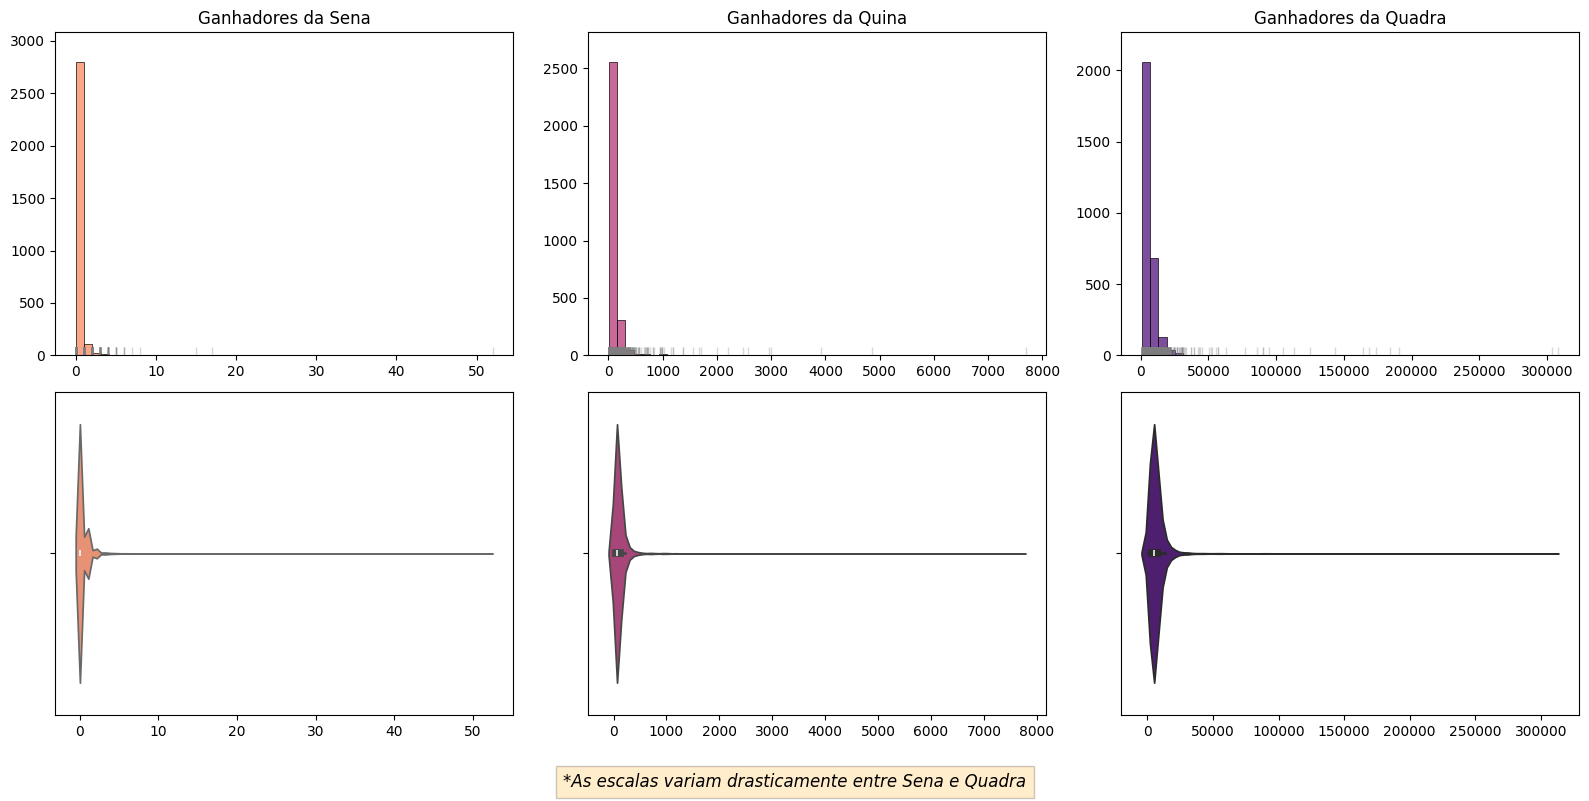

In [55]:
comparativo_SQQ(df['Wins_6'],df['Wins_5'],df['Wins_4']) #Função elaborada no arquivo "functions .py"

#note que, mesmo em escalas diferentes, 

Ganhar no jogo é um evento tão raro quanto a concentração dos dados perto de zero nos plots acima sugere. Todavia, conforme exige-se menos acertos, mais fácil o jogo fica! E isso se dá porque vencer uma quina ou especialmente uma quadra é matematicamente mais plausível! Veja que, conforme vamos de 6 acertos para 4, as distribuições de probabilidade ganham mais peso nas caudas à direita, ou seja, maior densidade de ganhadores (ou massa, porque falamos de variável discreta).

A priori, pense o seguinte: Quantos são os possíveis jogos? Ou seja, quantas combinações diferentes de 6 números eu posso extrair do conjunto numérico compreendido entre 1 e 60? Basta recorrer à combinatória: 

$$C(n, k) = \frac{n!}{k!(n-k)!}$$
#
<center> No nosso caso, como queremos amostrar todos os <b>diferentes</b> grupos de 6 dentre os 60, usamos:</center>

#

$$C(60, 6) = \frac{60!}{6!(60-6)!}$$

#

$$C(60, 6) = 50.063.860$$

Bingo! a Mega-Sena pode ter 50.063.860 resultados diferentes de 6 números. Isso quer dizer que o jogo que você fez é apenas 1 dos 50.063.860 possíveis (eis porque é importante dominar a análise combinatória para usar a probabilidade frequentista).

Sabendo disso, podemos derivar a probabilidade de acertar na quina e na quadra. Se engana quem pensa que é só repetir a combinatória mas trocar o 6 pelo 5. Isso nos daria, na verdade, todas as diferentes possibilidades de combinar 5 números no conjunto de 1 a 60. Isso seria útil se a Mega-Sena fosse um jogo onde você marcasse 5 números e o sorteio também fosse de apenas 5 valores, mas são 6.

Quando o sorteio acontece, o globo retira 6 números. Pra você ganhar a quina, o seu bilhete de 6 números precisa conter 5 dos que saíram e 1 dos que não saíram. Existem 6 formas de escolher qual número você errou e, para cada uma delas, existem 54 opções de números errados que podem estar no lugar.

Imagine que sorteio foi `[1 2 3 4 5 6]`. Mas seu jogo foi `[1 2 3 4 5 X]`. Quantas são as opções de `X`? Não são 60 porque ele não pode ser o 6, se fosse você estaria ganhando na mega (então nos restam 59). Contudo, ele também não pode ser nenhum dos outros 5 valores já escolhidos, afinal você não pode repetir, logo, nos restam 54 opções. E você concorda comigo que, para ganhar na quina, esses 54 valores errados que X pode ser pode estar em qualquer uma das 6 posições? Ou seja, existem $C(6, 5) = 6$ combinações de acertos possíveis dentro do seu bilhete

Em resumo, um único jogo premiado de 6 números contém `54*6 = 324` quinas possíveis dentro dele! Pra cada sena temos 324 quinas! por isso é muito mais fácil ganhar na quina ou na quadra (aplicando a mesma lógica para cada sena temos 21.465 quadras).
#

<center>Existindo 324 quinas em cada sorteio, a probabilidade é de 1 em:</center>

#

$$\frac{50.063.860}{324} \approx 154.518$$

#

<center>Existindo 21.465 quadras em cada sorteio, a probabilidade é de 1 em:</center>

#

$$\frac{50.063.860}{21.465} \approx 2.332$$

#
Isso explica por que, enquanto no eixo da Sena mal vemos a barra sair do zero, no eixo da Quadra os ganhadores contam-se aos milhares.

Agora vamos partir a outro aspecto: De que forma os vencedores se concentram pelo Brasil? Temos uma coluna com a localidade, mas esta, como vimos, está desfalcada... Ao mesmo tempo, algumas linhas parecem carregar mais de uma localidade!

In [56]:
# Quantos sorteios com ganhadores na Sena têm localidade informada?
localizados_sena = df[(df.get('Local').notnull()) & (df.get('Wins_6')!=0)].shape[0]

# Quanto isso representa do todo?

vencedores_sena = len(df[df.get('Wins_6') != 0])

vencedores_localizados_perc = (localizados_sena/vencedores_sena)*100

print(f'Dos {vencedores_sena} sorteios com vencedores na Mega-Sena, apenas \
{vencedores_localizados_perc:.2f}% possuem localização informada, ou seja, {localizados_sena}.')

Dos 647 sorteios com vencedores na Mega-Sena, apenas 96.45% possuem localização informada, ou seja, 624.


Descobrimos que a variável que indica localidade se refere exclusivamente à categoria Sena, e também que 23 sorteios com ganhadores não possuem esse dado. Quais são estes sorteios sem localidade?

In [57]:
sena_sem_local = df[(df.get('Local').isnull()) & (df.get('Wins_6') !=0)]
sena_sem_local.sample(5)

#como são 23 linhas, prefiro omitir o plot para manter o tamanho controlado, mas fique à vontade para tentar sem o "sample" e ver o que eu vi.

,Concurso,Data_Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Wins_6,Local,Rateio_6,Wins_5,Rateio_5,Wins_4,Rateio_4,Acum_6,Arrecad,Estimativa,Virada_Acum,Obs
164,165,1999-05-01,10,19,23,35,39,56,2,NaN,1044444.54,75,11968.35,5378,166.91,0.0,0.0,0.0,0.0,Ganhadores da SENA dos Estados de Minas Gerais...
123,124,1998-07-18,5,15,34,41,52,57,1,NaN,24536288.72,188,17242.12,14019,230.76,0.0,0.0,0.0,0.0,O PREMIO PRINCIPAL SAIU PARA A CIDADE DE VILA ...
199,200,1999-12-31,12,15,19,34,44,51,2,NaN,8829389.20,186,11008.48,13027,156.59,0.0,0.0,0.0,0.0,Os ganhadores da MEGASENA são de: Clevelândia/...
177,178,1999-07-31,5,15,19,26,27,33,1,NaN,6129539.43,198,6240.11,13086,94.07,0.0,0.0,0.0,0.0,Ganhador do Estado de São Paulo
156,157,1999-03-06,4,13,17,21,41,44,1,NaN,2140030.92,134,7224.03,8894,108.84,0.0,0.0,0.0,0.0,Ganhador da SENA do Estado de Goiás.


Muito interessante! Temos uma "proxy" da localidade: o comentário na última coluna. Essa coluna nos revela a localidade dos vencedores, exceto do concurso 24, o mais antigo (de 1996) dos que não tem localidade informada. Essa coluna de comentários está me chamando atenção. Antes de seguir a análise, gostaria de dar uma breve pausa para ver o que mais os comentários têm a dizer:

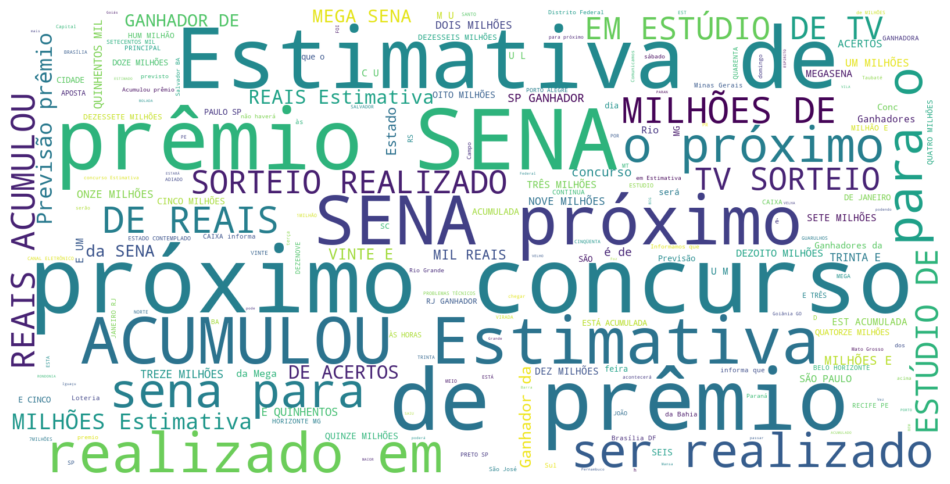

In [58]:
#Vamos plotar um quadro de palavras, como se fosse um "brainstorm", uma amostra aleatória daquilo que mais se repete na coluna Obs:
from wordcloud import WordCloud # caso queira, pode usar o argumento stopwords para ignorar palavras específicas

palavras = ", ".join(i for i in df['Obs'].dropna()) #juntando todas palavras em uma só string

brainstorm = WordCloud(background_color="white", 
                        width=1600,
                        height=800).generate(palavras) # caso queira, pode usar o argumento stopwords para ignorar palavras específicas
plt.figure(figsize=(12,10))
plt.imshow(brainstorm, interpolation='bilinear')
plt.axis("off")
plt.show()


Bom, o brainstorm de palavras é sem dúvidas um precursor do NLP... 

Mas ele apenas nos dá uma idea sobre o que versam os assuntos dos comentários: em sua grande maioria, sobre o montante que acumulou para o próximo sorteio ou a estimativa da Caixa para a premiação. A variabilidade é considerável e alguns comentários carregam também nomes de Estados e cidades, justamente nas linhas dos vencedores da Sena sem essa informação no campo 'localidade'. **Bingo! Encontramos uma informação relevante!** 

Vamos colocar esses dados na coluna certa, pois isso será importante na análise regional:

In [ ]:
Obs_to_Local_df = 5
local6_filtro = (df.get('Local').isnull()) & (df.get('Wins_6') != 0) 
df.loc[local6_filtro, 'Local'] = df.loc[local6_filtro, 'Obs'] #aplicando a cópia só no filtro

In [60]:
sena_sem_local

0       False
1       False
2       False
3       False
4       False
        ...  
2958    False
2959    False
2960    False
2961    False
2962    False
Length: 2963, dtype: bool

In [61]:
TV_comments = df[df.get('Obs').str.contains('TV', na=False)] #tratando os NA's como False pra não quebrar o código
TV_comments.sample(3)

,Concurso,Data_Sorteio,Bola1,Bola2,Bola3,Bola4,Bola5,Bola6,Wins_6,Local,Rateio_6,Wins_5,Rateio_5,Wins_4,Rateio_4,Acum_6,Arrecad,Estimativa,Virada_Acum,Obs
1618,1619,2014-07-23,5,8,17,42,46,47,0,NaN,0.0,92,18392.04,7438,324.98,17707151.21,28901780.0,22000000.0,41661025.35,Sorteio realizado em Estúdio de TV.
1364,1365,2012-02-22,2,24,26,32,35,50,0,NaN,0.0,52,23397.34,3368,516.05,18427847.04,20781492.0,22000000.0,7200250.08,SORTEIO REALIZADO EM ESTÚDIO DE TV.
1386,1387,2012-05-09,18,27,32,43,50,52,0,NaN,0.0,47,34677.09,3492,666.75,5706194.01,27838600.0,9000000.0,16671611.54,SORTEIO REALIZADO EM ESTÚDIO DE TV.


Os comentários com a palavra "TV" me intrigaram, precisei matar a curiosidade para saber o que era. Afinal, uma boa EDA não é "robótica". Esse processo é um misto de criatividade e técnica, ousaria dizer que é artesanal. A fluência na linguagem te permite explorar cada minúcia do dataset de formas não convencionais, podendo descobrir padrões valiosos que podem agregar valor ao negócio antes de tocar em estatística avançada ou ML.

Voltando ao caminho que fazíamos na análise, precisamos realizar uma operação que extraia os endereços da última coluna e os copie para a coluna 'Local'